K factors for Left & Right By H.Sanecki = 0.8301816551430399, 0.44206336463264134
K factors for Left & Right By Sabstitution = 0.9742597792165442, 0.016962733654682517
Reference Hydrostatic Force = 295131.0 N
Lateral Transfer Force = 282528.0 N
Left & Right Wall Force by H.Sanecki = 245012.0 N, 130467.0 N
Left & Right Wall Force by Substitution = 287534.0 N, 5006.0 N
Force Error in H.Sanecki = -167982.274731 N
Force Error in Sabstitution = -0.000000 N


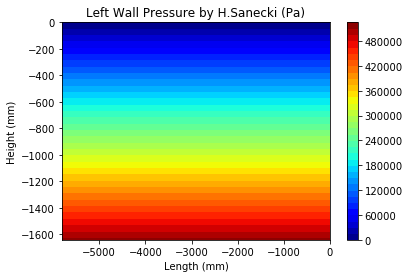

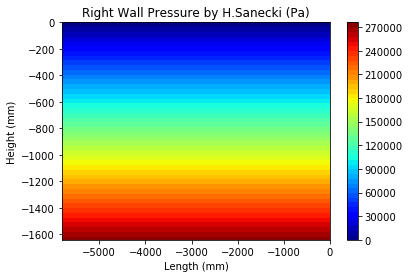

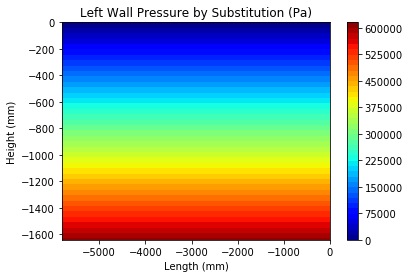

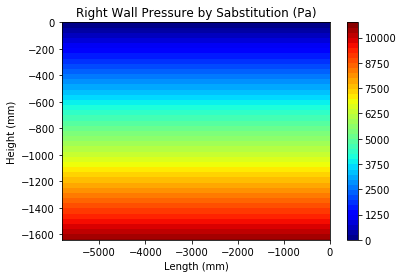

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 18 15:19:47 2020

@author: Jimit Vyas
"""
import numpy as np 
from scipy.integrate import quad 
from math import *
import matplotlib.pyplot as plt


#Angle of repose
phi = radians(38) #radians

#Initial angles
omega = 0
delta = 0

#load Factors
g = 9.810 
ay = 0.4
az = 2

#resultant acceleration
ayz = sqrt(ay**2+az**2)

#Angle of resultant
e = atan(ay/az)

#Bucket Dimensions 
L = 5806 #mm 
B = 3212 #mm 
h = 1640 #mm 
M = 72000 #kg 

#Lateral LoadTransfer
Ftrans = M*ay*g

#Tipper Volume
v1 = L*B*h 

#Angle of Maximum Stable embankment with symmetrical shape
beta0 = phi-e

#Overload Volume
v2 = L*(0.5*B*(0.5*B*tan(beta0)))

#Density
rho = M/((v1+v2)) #kg*mm-3 

#Hydrostatic Force
F = 0.5*rho*L*ayz*g*(h**2)

#Coefficient for Side wall 1 & 2 by H.Sanecki
KH1 = cos(e)*((cos(phi-e))**2)/((cos(e)**3))
KH2 = cos(e)*((cos(phi+e))**2)/((cos(e)**3))
print ("K factors for Left & Right By H.Sanecki = {}, {}".format(KH1, KH2))

#Pressure function for Wall 1 & 2 by H.Sanecki
FH1 = F*KH1
FH2 = F*KH2

#Coefficient for Side wall 1 by Substitution
omega = asin(Ftrans/(2*F*sin(phi)))
KS1 = cos(phi-omega)
KS2 = cos(phi+omega)
print ("K factors for Left & Right By Sabstitution = {}, {}".format(KS1, KS2))
#Pressure function for Wall 1 & 2 by Substitution
FS1 = F*KS1
FS2 = F*KS2

#Check Differences
diffH = ((FH1-FH2) - Ftrans)
diffS = ((FS1-FS2) - Ftrans)
print ("Reference Hydrostatic Force = {} N".format(round(F,0)))
print ("Lateral Transfer Force = {} N".format(round(Ftrans,0)))
print ("Left & Right Wall Force by H.Sanecki = {} N, {} N".format(round(FH1,0),round(FH2,0)))
print ("Left & Right Wall Force by Substitution = {} N, {} N".format(round(FS1,0),round(FS2,0)))
print ("Force Error in H.Sanecki = %f N" %diffH)
print ("Force Error in Sabstitution = %f N" %diffS)



#Pressure Plotting
def myplot(n,x,y,z,title,xlabel,ylabel):   
    plt.figure(n)
    plt.title(title)
    #plt.contour(x,y,z,20,linewidths=0.5, colors='k')
    plt.contourf(x,y,z,50,cmap=plt.cm.jet)
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

div = 100
Lp = np.linspace(0,-L,div)
Bp = np.linspace(0,B,div)
Hp= np.linspace(0,-h,div)

[l1, h1] = np.meshgrid(Lp, Hp)
[b1, h1] = np.meshgrid(Bp, Hp)

p11 = abs(rho*ayz*g*h1*KH1*10E6)
p12 = abs(rho*ayz*g*h1*KH2*10E6)
myplot(1,l1,h1,p11,"Left Wall Pressure by H.Sanecki (Pa)","Length (mm)", "Height (mm)")
myplot(2,l1,h1,p12,"Right Wall Pressure by H.Sanecki (Pa)","Length (mm)", "Height (mm)")

p21 = abs(rho*ayz*g*h1*KS1*10E6)
p22 = abs(rho*ayz*g*h1*KS2*10E6)
myplot(3,l1,h1,p21,"Left Wall Pressure by Substitution (Pa)","Length (mm)", "Height (mm)")
myplot(4,l1,h1,p22,"Right Wall Pressure by Sabstitution (Pa)","Length (mm)", "Height (mm)")